In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
print(os.path.abspath('.'))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines.utils import concordance_index
from sklearn.metrics import mean_squared_error

In [3]:
from DeepPurpose import oneliner
from DeepPurpose.dataset import *
from DeepPurpose import utils, encoders, dataset, DTI

In [4]:
model2 = DTI.model_pretrained(path_dir = './model_CNN_AAC_DB/')
model2

In [5]:
model2.config

{'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'hidden_dim_drug': 256,
 'hidden_dim_protein': 256,
 'cls_hidden_dims': [1024, 1024, 512],
 'batch_size': 1024,
 'train_epoch': 50,
 'test_every_X_epoch': 10,
 'LR': 0.001,
 'drug_encoding': 'CNN',
 'target_encoding': 'AAC',
 'result_folder': './result/',
 'binary': False,
 'num_workers': 10,
 'cnn_drug_filters': [32, 64, 96],
 'cnn_drug_kernels': [4, 6, 8],
 'mlp_hidden_dims_target': [1024, 256, 64],
 'decay': 0}

In [6]:
Smile = np.load("DB_smiles.npy", allow_pickle=True)
Target = np.load("DB_targets.npy", allow_pickle=True)
y = np.load("DB_y.npy", allow_pickle=True)
print('Done!')

Done!


In [7]:
drug = pd.DataFrame(Smile,columns=['drug'])
drug.head(1)

,drug
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1


In [8]:
drug2 = drug['drug'].unique()

In [9]:
drug2 = pd.DataFrame(drug2,columns=['drug'])
drug2.head(1)

,drug
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1


In [ ]:
#-----performance of the model on all data(test subset)

In [10]:
X_drug = Smile.tolist()
X_target = Target.tolist() 
y = y.tolist()

drug_encoding, target_encoding = 'CNN', 'AAC'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')


Drug Target Interaction Prediction Mode...
in total: 66434 drug-target pairs
encoding drug...
unique drugs: 10661
encoding protein...
unique target sequence: 1413
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
do not do train/test split on the data for already splitted data


In [11]:
y_pred = model2.predict(X) 
y_label = y
#print(sum_uncer)

predicting...


In [12]:
y_pred_ = pd.DataFrame(y_pred, columns=['y_pred'])
y_pred_.to_csv('y_pred_CNN_AAC_DB.csv')

In [13]:
MSE = mean_squared_error(y_label, y_pred)
CI = concordance_index(y_label, y_pred)

print(MSE)
print(CI)

0.22336528962919164
0.942537868490529


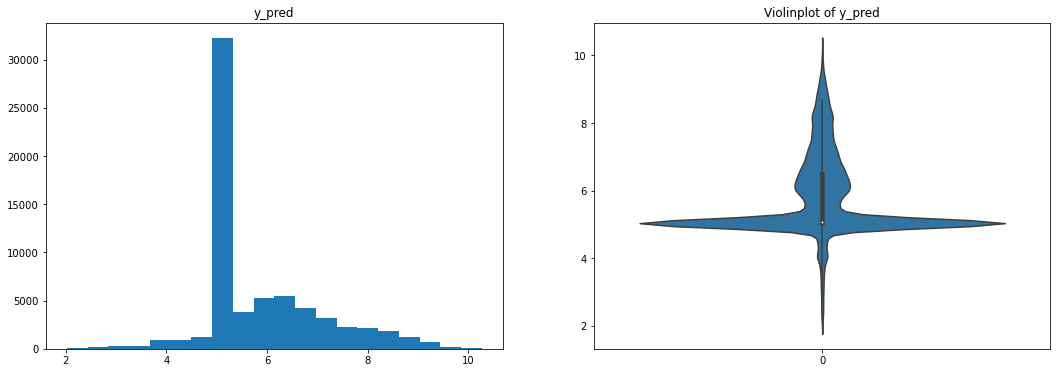

In [14]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [15]:
#-----screen potential drugs for Tie2

In [16]:
X_drug = drug2['drug'].values.tolist()
X_target = ['MDSLASLVLCGVSLLLSGTVEGAMDLILINSLPLVSDAETSLTCIASGWRPHEPITIGRDFEALMNQHQDPLEVTQDVTREWAKKVVWKREKASKINGAYFCEGRVRGEAIRIRTMKMRQQASFLPATLTMTVDKGDNVNISFKKVLIKEEDAVIYKNGSFIHSVPRHEVPDILEVHLPHAQPQDAGVYSARYIGGNLFTSAFTRLIVRRCEAQKWGPECNHLCTACMNNGVCHEDTGECICPPGFMGRTCEKACELHTFGRTCKERCSGQEGCKSYVFCLPDPYGCSCATGWKGLQCNEACHPGFYGPDCKLRCSCNNGEMCDRFQGCLCSPGWQGLQCEREGIQRMTPKIVDLPDHIEVNSGKFNPICKASGWPLPTNEEMTLVKPDGTVLHPKDFNHTDHFSVAIFTIHRILPPDSGVWVCSVNTVAGMVEKPFNISVKVLPKPLNAPNVIDTGHNFAVINISSEPYFGDGPIKSKKLLYKPVNHYEAWQHIQVTNEIVTLNYLEPRTEYELCVQLVRRGEGGEGHPGPVRRFTTASIGLPPPRGLNLLPKSQTTLNLTWQPIFPSSEDDFYVEVERRSVQKSDQQNIKVPGNLTSVLLNNLHPREQYVVRARVNTKAQGEWSEDLTAWTLSDILPPQPENIKISNITHSSAVISWTILDGYSISSITIRYKVQGKNEDQHVDVKIKNATITQYQLKGLEPETAYQVDIFAENNIGSSNPAFSHELVTLPESQAPADLGGGKMLLIAILGSAGMTCLTVLLAFLIILQLKRANVQRRMAQAFQNVREEPAVQFNSGTLALNRKVKNNPDPTIYPVLDWNDIKFQDVIGEGNFGQVLKARIKKDGLRMDAAIKRMKEYASKDDHRDFAGELEVLCKLGHHPNIINLLGACEHRGYLYLAIEYAPHGNLLDFLRKSRVLETDPAFAIANSTASTLSSQQLLHFAADVARGMDYLSQKQFIHRDLAARNILVGENYVAKIADFGLSRGQEVYVKKTMGRLPVRWMAIESLNYSVYTTNSDVWSYGVLLWEIVSLGGTPYCGMTCAELYEKLPQGYRLEKPLNCDDEVYDLMRQCWREKPYERPSFAQILVSLNRMLEERKTYVNTTLYEKFTYAGIDCSAEEAA']
y = np.ones(len(drug2)).tolist()

drug_encoding, target_encoding = 'CNN', 'AAC'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')


Drug Target Interaction Prediction Mode...
in total: 10661 drug-target pairs
encoding drug...
unique drugs: 10661
encoding protein...
unique target sequence: 1
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
do not do train/test split on the data for already splitted data


In [17]:
y_pred = model2.predict(X) 
#y_pred, sum_uncer = model2.predict(X) 
y_label = y
#print(sum_uncer)

predicting...


In [20]:
def convert_y_unit(y, from_, to_):
	# basis as nM

	if from_ == 'nM':
		y = y
	elif from_ == 'p':
		y = 10**(-y) / 1e-9

	if to_ == 'p':
		y = -np.log10(y*1e-9 + 1e-10)
	elif to_ == 'nM':
		y = y

	return y

In [21]:
y_pred = convert_y_unit(np.array(y_pred), 'p', 'nM')

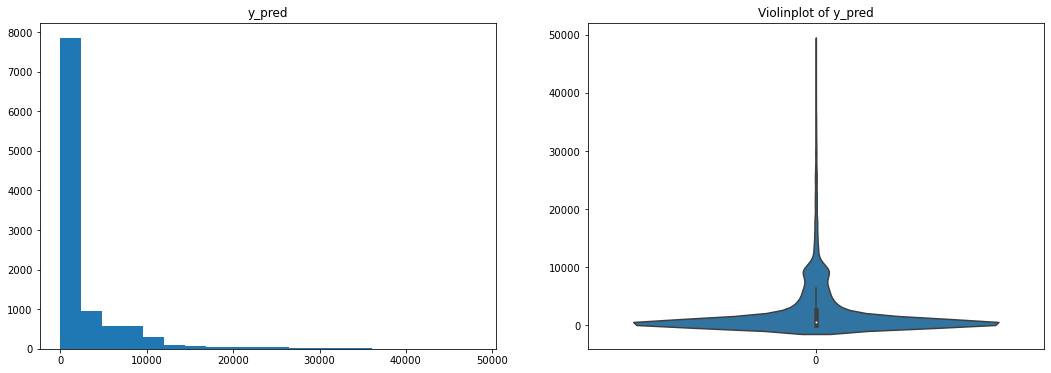

In [22]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [23]:
a=drug2
a

,drug
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1
1,COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1
2,NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1
3,NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1
4,COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O
...,...
10656,O=C(NCCCCS(=O)(=O)c1ccccc1)c1ccc2nccn2c1
10657,CCOc1cc(ccc1C1=N[C@@](C)(c2ccc(Cl)cc2)[C@](C)(...
10658,COc1cc(ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C)C)[C@@...
10659,CC(C)(C)C[C@@H]1N[C@H]([C@H](c2cccc(Cl)c2F)[C@...


In [24]:
b=pd.DataFrame(y_pred,columns=['y_pred'])
b

,y_pred
0,17.678352
1,20.556207
2,66.603830
3,10.180902
4,56.101296
...,...
10656,791.584177
10657,35.576732
10658,12.857601
10659,37.046488


In [25]:
c=pd.concat([a,b],axis=1)
c

,drug,y_pred
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,17.678352
1,COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,20.556207
2,NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1,66.603830
3,NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1,10.180902
4,COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O,56.101296
...,...,...
10656,O=C(NCCCCS(=O)(=O)c1ccccc1)c1ccc2nccn2c1,791.584177
10657,CCOc1cc(ccc1C1=N[C@@](C)(c2ccc(Cl)cc2)[C@](C)(...,35.576732
10658,COc1cc(ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C)C)[C@@...,12.857601
10659,CC(C)(C)C[C@@H]1N[C@H]([C@H](c2cccc(Cl)c2F)[C@...,37.046488


In [26]:
c.to_csv('y_pred_TIE2_CNN_AAC_DB.csv')

In [27]:
d=c.sort_values(axis=0, ascending=True, by='y_pred')
d

,drug,y_pred
967,COC(=O)C[C@@H]1N=C(c2c(C)c(sc2-n2c(C)nnc12)C(=...,0.970100
968,COC(=O)C[C@@H]1N=C(c2c(C)c(sc2-n2c(C)nnc12)C(=...,1.166449
1211,COc1nc2ccc(cc2c(Cl)c1Cc1ccc(cc1)C(F)(F)F)C(O)(...,1.254525
969,COC(=O)C[C@@H]1N=C(c2c(C)c(sc2-n2c(C)nnc12)C(=...,1.386909
3420,CC1(C)C2=C3C=C4C(CC[N+]5=C4C(C)(C)c4cc(CC(=O)N...,1.545845
...,...,...
8224,NCCc1ccc(O)cc1,42446.226621
6432,Oc1ccc(O)n1-c1ccc(O)cc1,43013.805243
6594,COc1ccc(NC(C)=O)cc1Cl,43444.583540
4272,ONC(=O)c1ccccc1,45112.101664


In [28]:
d.to_csv('y_pred_TIE2_CNN_AAC_DB_SORTED.csv')